# 03 - Deep Feature Synthesis (DFS)

Deep Feature Synthesis (DFS) is an automated feature engineering technique that creates new features from your dataset by applying aggregation and transformation operations to relationships in the data. 

In the more simple way: Deep Feature Synthesis (DFS) is a method that automatically creates new features for your dataset. It does this by combining existing columns in smart ways, such as summarizing data (e.g., taking averages or totals) or transforming data (e.g., extracting months from dates). It helps uncover patterns and relationships in your data without manually writing code for each new feature.

In [19]:
# pip install featuretools
import pandas as pd
import featuretools as ft

In [20]:
# Load dataset
df = pd.read_csv("Numeric data (last year work).csv")


In [21]:
# Step 1: Create an EntitySet
es = ft.EntitySet(id="dataset")

# Step 2: Add the primary dataframe to the EntitySet
# Here, 'customer_id' is assumed to be the unique identifier.
es = es.add_dataframe(
    dataframe_name="data",
    dataframe=df,
    index="index",  # Create an index if not present; otherwise, use an existing unique column.
    make_index=True,  # Set to False if your dataframe already has a unique index column.
)

# Step 3: Run DFS
# Specify a target dataframe (e.g., "data") and choose aggregation and transformation primitives
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="data",  # The table for which to create features
    agg_primitives=["mean", "sum", "max", "min", "count"],  # Aggregation operations
    trans_primitives=["day", "month", "year", "weekday", "is_weekend"],  # Transformation operations
)

# Step 4: Inspect the generated features
print("Generated Feature Matrix:")
print(feature_matrix.head())

Generated Feature Matrix:
       Rating    Votes  Meta Score  Year  Duration  Action  Adventure  \
index                                                                   
0         6.5  90000.0        67.0  2023       138       0          0   
1         7.4  24000.0        66.0  2023       116       0          1   
2         7.0  21000.0        85.0  2023       117       0          0   
3         7.1  56000.0        54.0  2023       157       1          1   
4         6.6  66000.0        64.0  2023       158       1          1   

       Animation  Biography  Comedy  ...  PG Rating_NC-17  PG Rating_PG  \
index                                ...                                  
0              0          0       0  ...                0             0   
1              0          0       1  ...                0             1   
2              0          0       1  ...                0             0   
3              0          0       0  ...                0             0   
4           

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'is_weekend', 'month', 'weekday', 'year']
  agg_primitives: ['count', 'max', 'mean', 'min', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.wa

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Highlight missing values and column data types
# Limit to 20 rows
styled_matrix = feature_matrix.head(20).style.background_gradient(cmap='coolwarm', axis=0).highlight_null()

# Display the styled matrix
print("Styled Feature Matrix (First 20 Rows):")
display(styled_matrix)  # For Jupyter Notebooks


Styled Feature Matrix (First 20 Rows):


,Rating,Votes,Meta Score,Year,Duration,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,PG Rating_13+,PG Rating_16+,PG Rating_18+,PG Rating_Approved,PG Rating_G,PG Rating_GP,PG Rating_NC-17,PG Rating_PG,PG Rating_PG-13,PG Rating_Passed,PG Rating_R,PG Rating_TV-14,PG Rating_TV-G,PG Rating_TV-MA,PG Rating_TV-PG,PG Rating_TV-Y7
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6.500000,90000.000000,67.000000,2023,138,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,7.400000,24000.000000,66.000000,2023,116,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7.000000,21000.000000,85.000000,2023,117,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,7.100000,56000.000000,54.000000,2023,157,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,6.600000,66000.000000,64.000000,2023,158,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,7.500000,13000.000000,61.000000,2023,131,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,7.000000,417000.000000,80.000000,2023,114,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,7.500000,213000.000000,49.000000,1989,97,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,6.300000,9200.000000,40.000000,2023,118,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [23]:

# Step 2: Summarize the features (limit to 20 rows)
summary = pd.DataFrame({
    "Feature": feature_matrix.columns,
    "Data Type": feature_matrix.dtypes.values,
    "Non-Null Count": feature_matrix.notnull().sum().values,
    "Unique Values": feature_matrix.nunique().values,
}).head(20)  # Limit to the first 20 rows

# Print summary
print("\nSummary of Generated Features (Up to 20 Rows):")
display(summary)



Summary of Generated Features (Up to 20 Rows):


,Feature,Data Type,Non-Null Count,Unique Values
0,Rating,float64,1131,23
1,Votes,float64,1131,443
2,Meta Score,float64,1131,63
3,Year,int64,1131,46
4,Duration,int64,1131,83
5,Action,int64,1131,2
6,Adventure,int64,1131,2
7,Animation,int64,1131,2
8,Biography,int64,1131,2
9,Comedy,int64,1131,2


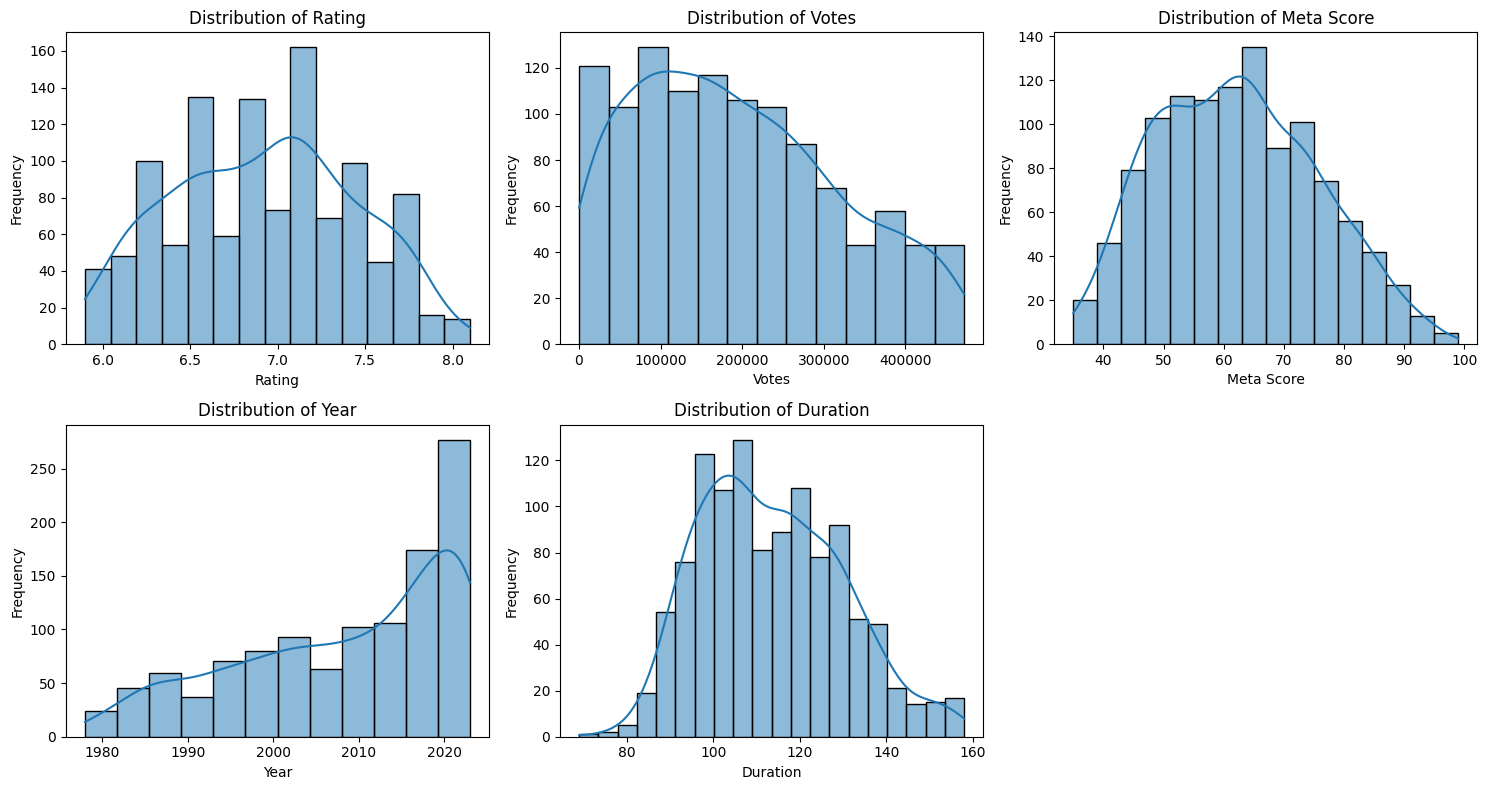

In [24]:
# Step 3: Visualize feature distributions
plt.figure(figsize=(15, 8))
for i, column in enumerate(feature_matrix.columns[:5]):  # Visualize first 5 features
    plt.subplot(2, 3, i + 1)
    sns.histplot(feature_matrix[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

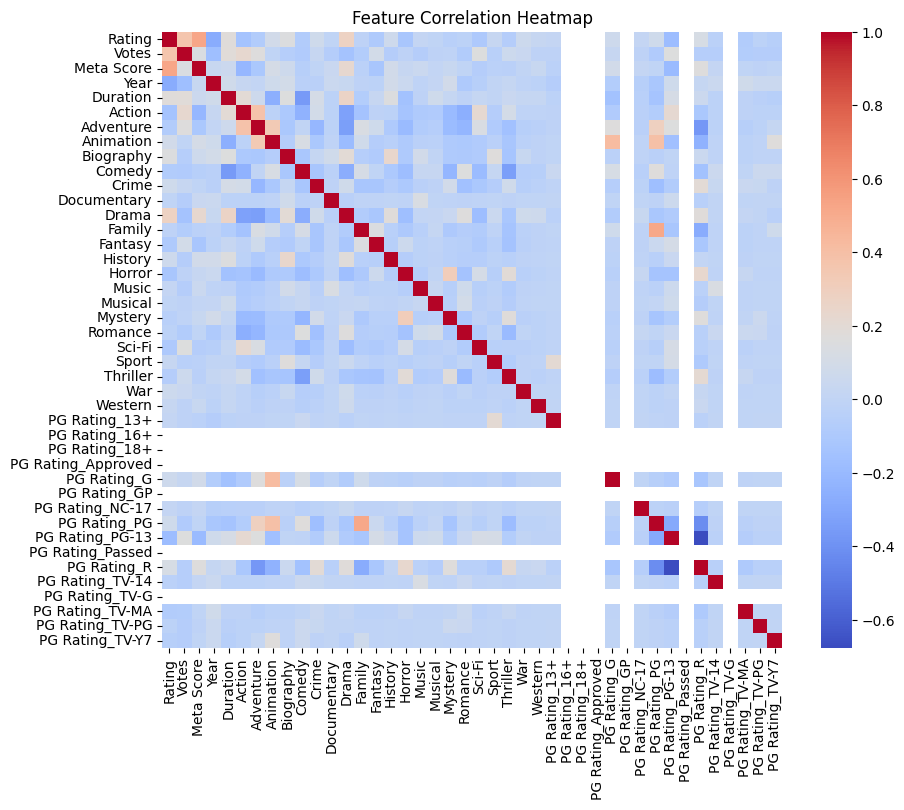

In [25]:
# Step 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(feature_matrix.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [27]:
import pandas as pd
import featuretools as ft
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")

# Step 1: Create an EntitySet
es = ft.EntitySet(id="dataset")

# Add the primary dataframe to the EntitySet
# Replace 'index' with your unique identifier column if it exists; otherwise, set make_index=True.
es = es.add_dataframe(
    dataframe_name="data",
    dataframe=df,
    index="index",  # Create an index if not already present
    make_index=True
)

# Step 2: Run Deep Feature Synthesis (DFS)
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="data",  # The table for which to create features
    agg_primitives=["mean", "sum", "max", "min", "count"],  # Aggregation operations
    trans_primitives=["day", "month", "year", "weekday", "is_weekend"],  # Transformation operations
)

# Step 3: Prepare data for linear regression
# Assuming 'Y' is the target column in the original dataset
target_column = 'Rating'  
X = feature_matrix.drop(columns=[target_column], errors='ignore')  # Drop the target column from features
y = feature_matrix[target_column]  # Define the target variable

# Drop columns with missing values
X = X.dropna(axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions and evaluate the model
predictions = model.predict(X_test)

# Metrics
print("\nMetrics for Linear Regression with DFS:")
print("MAE:", round(mean_absolute_error(y_test, predictions), 2))
print("MSE:", round(mean_squared_error(y_test, predictions), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, predictions)), 2))
print("R-squared:", round(r2_score(y_test, predictions), 2))

# Step 6: Inspect important features (coefficients)
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance (Top 10):")
print(coefficients.head(10))


C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['day', 'is_weekend', 'month', 'weekday', 'year']
  agg_primitives: ['count', 'max', 'mean', 'min', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.wa


Metrics for Linear Regression with DFS:
MAE: 0.29
MSE: 0.13
RMSE: 0.36
R-squared: 0.5

Feature Importance (Top 10):
        Feature  Coefficient
10  Documentary     0.508911
6     Animation     0.218390
7     Biography     0.143026
11        Drama     0.139059
21        Sport     0.084454
14      History     0.052574
23          War     0.030781
1    Meta Score     0.014768
3      Duration     0.003472
0         Votes     0.000001
